In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 20
pd.options.display.max_rows = 30
pd.options.mode.copy_on_write = True

In [2]:
import requests
import pandas as pd

# Define the URL for the API
url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync"

# Define the SQL query to retrieve the required data
query = """
SELECT 
    pl_name, 
    hostname, 
    pl_orbsmax, 
    pl_orbsmaxerr1, 
    pl_orbsmaxerr2, 
    pl_bmasse, 
    pl_bmasseerr1, 
    pl_bmasseerr2, 
    sy_pnum, 
    pl_orbeccen, 
    pl_orbeccenerr1, 
    pl_orbeccenerr2, 
    pl_orbincl, 
    pl_orbinclerr1, 
    pl_orbinclerr2
FROM ps
WHERE 
    default_flag = 1 AND
    sy_pnum > 1
"""

# Define the parameters for the request
params = {
    "query": query,
    "format": "json",
}

# Make the request to the API
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Convert the JSON data to a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Display the DataFrame
    # print(df)
else:
    print(f"Error: {response.status_code}")

In [3]:
rm_hostnames = []

for hostname in df["hostname"].unique():
    df_host = df[df["hostname"] == hostname]
    # if df_host contains NaN values, save hostname to a list
    if df_host.isnull().values.any():
        # print(df_host)
        rm_hostnames.append(hostname)

# len(rm_hostnames)
df_clean = df[~df["hostname"].isin(rm_hostnames)]

In [4]:
len(df_clean["hostname"].unique())

38

In [5]:
df_clean["hostname"].unique()

array(['KOI-94', 'Kepler-79', 'Kepler-117', 'Kepler-138', 'Kepler-419',
       'Kepler-87', 'Kepler-411', 'K2-32', 'K2-199', 'HD 66428',
       'HD 72659', 'HD 73267', 'iot Dra', '14 Her', 'bet Pic',
       'HD 111232', 'HD 30177', 'Kepler-47', 'HD 106315', 'K2-138',
       'HD 23472', 'PDS 70', 'HD 15337', 'TOI-270', 'TOI-125',
       'EPIC 249893012', 'TOI-1130', 'WASP-148', 'TOI-421', 'TOI-776',
       'TOI-2202', 'TOI-1064', 'HD 73583', 'HD 260655', 'HD 62364',
       'HD 206893', 'TOI-2525', 'TOI-836'], dtype=object)

In [6]:
# df_clean[df_clean["hostname"] == "HD 72659"]

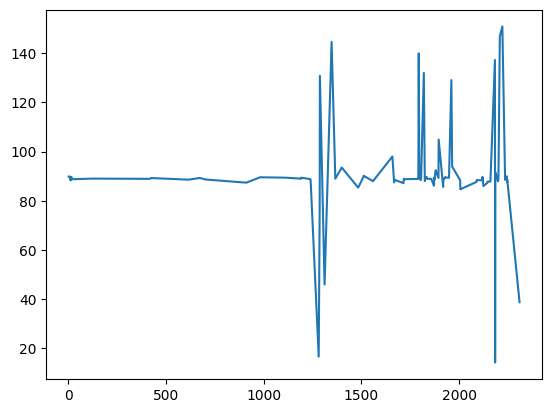

In [7]:
plt.plot(df_clean["pl_orbincl"])

In [8]:
# sort the DataFrame by the hostname
df_clean = df_clean.sort_values(by="hostname")

In [9]:
maxmass_plnames = []

for hostname in df_clean["hostname"].unique():
    df_host = df_clean[df_clean["hostname"] == hostname]
    
    # take the planet with maximum mass
    maxmass_pl = df_host["pl_bmasse"].idxmax()
    maxmass_plnames.append(hostname)

    df_clean.loc[df_host.index, "pl_relincl"] = \
        df_host.loc[maxmass_pl, "pl_orbincl"] - df_host["pl_orbincl"]
    
    df_clean.loc[df_host.index, "pl_relinclerr1"] = \
        np.sqrt(df_host.loc[maxmass_pl, "pl_orbinclerr1"]**2 + df_host["pl_orbinclerr1"]**2)
    
    df_clean.loc[df_host.index, "pl_relinclerr2"] = \
        np.sqrt(df_host.loc[maxmass_pl, "pl_orbinclerr2"]**2 + df_host["pl_orbinclerr2"]**2)

In [10]:
df_clean

,pl_name,hostname,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,sy_pnum,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_relincl,pl_relinclerr1,pl_relinclerr2
1347,14 Her b,14 Her,2.7740,0.1090,-0.1200,2559.47216,518.69596,-280.64248,2,0.3730,0.0080,-0.0060,144.652,6.279,-3.241,0.000,8.879847,4.583466
1960,HD 145675 c,14 Her,11.9240,1.2960,-1.1530,1597.08775,277.46420,-339.12291,2,0.3930,0.0450,-0.0480,129.097,6.255,-29.051,15.555,8.862893,29.231228
1871,EPIC 249893012 b,EPIC 249893012,0.0470,0.0050,-0.0070,8.75000,1.09000,-1.08000,3,0.0600,0.0800,-0.0400,86.140,2.600,-3.500,1.800,2.703257,3.654107
1872,EPIC 249893012 c,EPIC 249893012,0.1300,0.0100,-0.0200,14.67000,1.84000,-1.89000,3,0.0700,0.0800,-0.0500,87.940,0.740,-1.050,0.000,1.046518,1.484924
1873,EPIC 249893012 d,EPIC 249893012,0.2200,0.0200,-0.0400,10.18000,2.46000,-2.42000,3,0.1500,0.2100,-0.1100,89.470,0.360,-0.500,-1.530,0.822922,1.162970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,WASP-148 c,WASP-148,0.2044,0.0021,-0.0038,124.58874,7.31005,-8.58137,2,0.1809,0.0180,-0.0072,104.900,4.600,-7.300,0.000,6.505382,10.323759
1366,bet Pic b,bet Pic,10.0180,0.0820,-0.0760,3727.80939,742.76499,-678.56365,2,0.1060,0.0070,-0.0060,89.009,0.012,-0.012,0.000,0.016971,0.016971
1839,bet Pic c,bet Pic,2.6800,0.0160,-0.0150,3222.46222,373.44838,-327.68109,2,0.3140,0.0240,-0.0340,88.947,0.083,-0.091,0.062,0.083863,0.091788
1311,iot Dra b,iot Dra,1.4530,0.0260,-0.0260,3756.73177,133.48793,-130.30965,2,0.7010,0.0016,-0.0017,46.000,27.000,-19.000,40.000,33.015148,26.870058


In [11]:
def amd(m: np.array, e: np.array, i: np.array, a: np.array) -> np.array:
    return m * np.sqrt(a) * (1 - np.sqrt(1 - e**2) * np.cos(np.deg2rad(i)))

def namd(amd: np.array, m: np.array, a: np.array) -> float:
    return np.sum(amd) / np.sum(m * np.sqrt(a))

In [12]:
for hostname in df_clean["hostname"].unique():
    df_host = df_clean[df_clean["hostname"] == hostname]
    
    # calculate the AMD
    amd_val = amd(
        df_host["pl_bmasse"], 
        df_host["pl_orbeccen"], 
        df_host["pl_relincl"], 
        df_host["pl_orbsmax"])
    
    df_clean.loc[df_host.index, "amd"] = amd_val

    # calculate the NAMD
    namd_val = namd(amd_val, df_host["pl_bmasse"], df_host["pl_orbsmax"])

    df_clean.loc[df_host.index, "namd"] = namd_val

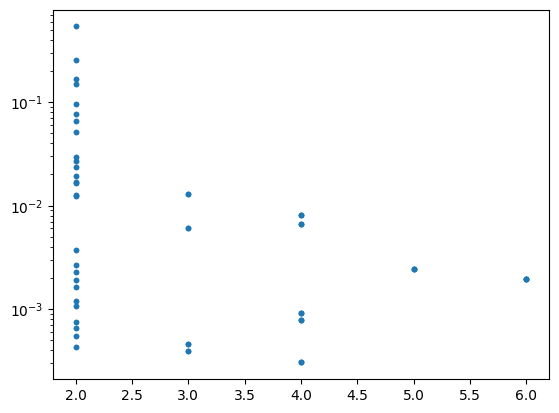

In [13]:
plt.plot(df_clean["sy_pnum"], df_clean["namd"], '.')
plt.yscale("log")

In [14]:
df_clean

,pl_name,hostname,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,sy_pnum,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_relincl,pl_relinclerr1,pl_relinclerr2,amd,namd
1347,14 Her b,14 Her,2.7740,0.1090,-0.1200,2559.47216,518.69596,-280.64248,2,0.3730,0.0080,-0.0060,144.652,6.279,-3.241,0.000,8.879847,4.583466,307.646703,0.095842
1960,HD 145675 c,14 Her,11.9240,1.2960,-1.1530,1597.08775,277.46420,-339.12291,2,0.3930,0.0450,-0.0480,129.097,6.255,-29.051,15.555,8.862893,29.231228,629.479407,0.095842
1871,EPIC 249893012 b,EPIC 249893012,0.0470,0.0050,-0.0070,8.75000,1.09000,-1.08000,3,0.0600,0.0800,-0.0400,86.140,2.600,-3.500,1.800,2.703257,3.654107,0.004352,0.006106
1872,EPIC 249893012 c,EPIC 249893012,0.1300,0.0100,-0.0200,14.67000,1.84000,-1.89000,3,0.0700,0.0800,-0.0500,87.940,0.740,-1.050,0.000,1.046518,1.484924,0.012975,0.006106
1873,EPIC 249893012 d,EPIC 249893012,0.2200,0.0200,-0.0400,10.18000,2.46000,-2.42000,3,0.1500,0.2100,-0.1100,89.470,0.360,-0.500,-1.530,0.822922,1.162970,0.055706,0.006106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,WASP-148 c,WASP-148,0.2044,0.0021,-0.0038,124.58874,7.31005,-8.58137,2,0.1809,0.0180,-0.0072,104.900,4.600,-7.300,0.000,6.505382,10.323759,0.929317,0.029624
1366,bet Pic b,bet Pic,10.0180,0.0820,-0.0760,3727.80939,742.76499,-678.56365,2,0.1060,0.0070,-0.0060,89.009,0.012,-0.012,0.000,0.016971,0.016971,66.473884,0.019520
1839,bet Pic c,bet Pic,2.6800,0.0160,-0.0150,3222.46222,373.44838,-327.68109,2,0.3140,0.0240,-0.0340,88.947,0.083,-0.091,0.062,0.083863,0.091788,266.816829,0.019520
1311,iot Dra b,iot Dra,1.4530,0.0260,-0.0260,3756.73177,133.48793,-130.30965,2,0.7010,0.0016,-0.0017,46.000,27.000,-19.000,40.000,33.015148,26.870058,2054.466718,0.168620


In [20]:
userid = "14 Her"
user_df = df_clean[df_clean["hostname"] == userid]

In [21]:
user_df

,pl_name,hostname,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,sy_pnum,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_relincl,pl_relinclerr1,pl_relinclerr2,amd,namd
1347,14 Her b,14 Her,2.774,0.109,-0.120,2559.47216,518.69596,-280.64248,2,0.373,0.008,-0.006,144.652,6.279,-3.241,0.000,8.879847,4.583466,307.646703,0.095842
1960,HD 145675 c,14 Her,11.924,1.296,-1.153,1597.08775,277.46420,-339.12291,2,0.393,0.045,-0.048,129.097,6.255,-29.051,15.555,8.862893,29.231228,629.479407,0.095842


In [76]:
Npt = 10000

pl_dist = {}

for pl_name in user_df["pl_name"]:
    pl_dist[pl_name] = {}

    pl_df = user_df[user_df["pl_name"] == pl_name]
    
    pl_df_mcmc_samples = pd.DataFrame(columns=["pl_bmasse", "pl_orbsmax", "pl_orbeccen", "pl_orbincl"], index=range(Npt))
    
    pl_df_mcmc_samples["pl_bmasse"] = np.random.normal(
        loc=pl_df["pl_bmasse"],
        scale=0.5 * (pl_df["pl_bmasseerr1"]-pl_df["pl_bmasseerr2"]),
        size=Npt)
    
    pl_df_mcmc_samples["pl_orbsmax"] = np.random.normal(
        loc=pl_df["pl_orbsmax"],
        scale=0.5 * (pl_df["pl_orbsmaxerr1"]-pl_df["pl_orbsmaxerr2"]),
        size=Npt)

    pl_df_mcmc_samples["pl_orbeccen"] = np.random.normal(
        loc=pl_df["pl_orbeccen"],
        scale=0.5 * (pl_df["pl_orbeccenerr1"]-pl_df["pl_orbeccenerr2"]),
        size=Npt)

    pl_df_mcmc_samples["pl_relincl"] = np.random.normal(
        loc=pl_df["pl_relincl"],
        scale=0.5 * (pl_df["pl_orbinclerr1"]-pl_df["pl_orbinclerr2"]),
        size=Npt)

    pl_dist[pl_name]["unphysical_idx"] = (
        (pl_df_mcmc_samples["pl_orbeccen"] >= 0) & (pl_df_mcmc_samples["pl_orbeccen"] <= 1) &
        (pl_df_mcmc_samples["pl_relincl"] >= 0) & (pl_df_mcmc_samples["pl_relincl"] <= 180) &
        (pl_df_mcmc_samples["pl_orbsmax"] >= 0) &
        (pl_df_mcmc_samples["pl_bmasse"] >= 0)
        )
    
    pl_df_mcmc_samples["amd"] = amd(
        pl_df_mcmc_samples["pl_bmasse"], 
        pl_df_mcmc_samples["pl_orbeccen"], 
        pl_df_mcmc_samples["pl_relincl"], 
        pl_df_mcmc_samples["pl_orbsmax"])
    
    # pl_df_amd = amd(
    #     pl_df["pl_bmasse"], 
    #     pl_df["pl_orbeccen"], 
    #     pl_df["pl_relincl"], 
    #     pl_df["pl_orbsmax"])
    
    pl_df["amd_median"] = pl_df_mcmc_samples["amd"].median()
    pl_df["amd_16th"] = pl_df_mcmc_samples["amd"].quantile(0.16)
    pl_df["amd_84th"] = pl_df_mcmc_samples["amd"].quantile(0.84)

    # plt.figure()
    # plt.hist(pl_df_mcmc_samples["amd"], bins=50)
    # plt.vlines(pl_df["amd"].values, 0, 100, color="red")
    # plt.show()

    df_clean.loc[pl_df.index, "amd_median"] = pl_df["amd_median"]
    df_clean.loc[pl_df.index, "amd_16th"] = pl_df["amd_16th"]
    df_clean.loc[pl_df.index, "amd_84th"] = pl_df["amd_84th"]

    pl_dist[pl_name]["amd"] = pl_df_mcmc_samples["amd"].values
    pl_dist[pl_name]["pl_bmasse"] = pl_df_mcmc_samples["pl_bmasse"].values
    pl_dist[pl_name]["pl_orbsmax"] = pl_df_mcmc_samples["pl_orbsmax"].values

In [77]:
pl_dist["14 Her b"].keys()

dict_keys(['unphysical_idx', 'amd', 'pl_bmasse', 'pl_orbsmax'])

In [78]:
pl_dist["14 Her b"]["unphysical_idx"].sum()

4951

In [79]:
namd_val_list = []

for k in range(Npt):
    amd_list = []
    pl_bmasse_list = []
    pl_orbsmax_list = []

    for key in pl_dist.keys():
        if pl_dist[key]["unphysical_idx"][k]:
            continue
        amd_list.append(pl_dist[key]["amd"][k])
        pl_bmasse_list.append(pl_dist[key]["pl_bmasse"][k])
        pl_orbsmax_list.append(pl_dist[key]["pl_orbsmax"][k])

    namd_val_list.append(namd(np.array(amd_list), np.array(pl_bmasse_list), np.array(pl_orbsmax_list)))

namd_vals = np.array(namd_val_list)

/var/folders/gv/0f5fz0_565vdf1lf_1kqh0kw0000gn/T/ipykernel_4960/1487042934.py:5: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(amd) / np.sum(m * np.sqrt(a))


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 3.000e+00,
        6.000e+00, 7.000e+00, 1.600e+01, 2.200e+01, 3.000e+01, 3.900e+01,
        8.500e+01, 3.840e+02, 1.126e+03, 1.330e+03, 8.770e+02, 4.880e+02,
        2.760e+02, 1.870e+02, 1.610e+02, 1.330e+02, 1.170e+02, 9.000e+01,
        8.800e+01, 6.600e+01, 6.100e+01, 4.100e+01, 3.100e+01, 3.700e+01,
        2.900e+01, 3.000e+01, 2.200e+01, 2.100e+01, 1.400e+01, 2.100e+01,
        1.300e+01, 1.200e+01, 1.200e+01, 8.000e+00, 6.000e+00, 1.200e+01,
        8.000e+00, 9.000e+00, 5.000e+00, 5.000e+00, 1.100e+01, 2.000e+00,
        6.000e+00, 3.000e+00, 7.000e+00, 6.000e+00, 7.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

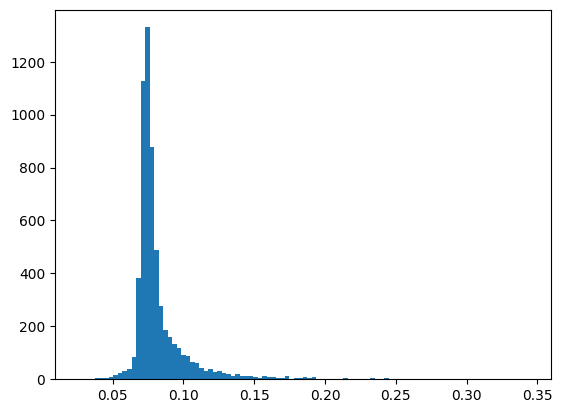

In [81]:
plt.hist(namd_vals, bins=100)